<img src="C:\\Users\\byabh\\Desktop\\pm\\project\\rbs.jpg" width="300">
# Project: Medical Appointment No-Show
## Course: Python Methodologies for Data Science (PMDS) 
## Spring 2018, Rutgers Business School
## Professor: Lars Sorensen 
## Team: Abhilash Basuru Yethesh Kumar, Ajay Simha Subraveti Ranganatha, Annapoorna Chandrashekar Kadur, Supriya Nanjundaswamy


<img src="C:\\Users\\byabh\\Desktop\\pm\\project\\noshow.jpg" width="500">
<img src="C:\\Users\\byabh\\Desktop\\pm\\project\\noshow1.jpg" width="650">

#### List of required Python Machine learning Packages, Third party libraries for Statistical analysis and visualization

In [1]:
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

#### Read data in csv file using read csv from pandas library

In [2]:
data = pd.read_csv("C:/Users/byabh/Desktop/pm/project/noshow_appointments.csv")

### 1. Dataset Check

#### 1.1 Check how many rows and columns we have in dataset

In [3]:
data.shape

(110527, 14)

#### We have a total of 110527 observations with 14 features in our dataset

#### 1.2 Check information of each attribute

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 1.3 Check for any missing values

In [5]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### No missing values observed

#### 1.4 Display the first five rows of the data

In [6]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2. Data Cleaning

#### 2.1. Correct the typos in column names - from the above table, we can see Hypertension as Hipertension and Handicap as Handcap. Renamed N0-show to NoShow

In [7]:
data.rename(columns = {'Handcap': 'Handicap','Hipertension': 'Hypertension', 'No-show': 'NoShow'}, inplace = True)

print(data.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow'],
      dtype='object')


#### 2.2. It is always advisable  to keep uniform datatime format when working with date and time columns - convert the ScheduledDay and AppointmentDay columns into datetime64 format 

In [8]:
data.ScheduledDay = data.ScheduledDay.apply(np.datetime64)
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)

#### 2.3 Extract new features from the exisitng features - define two functions timecal and datesep.
whichHour, ScheduledDayDate are the new features extracted by applying the functions on ScheduledDay and AppointmentDay columns.
timecal will split the schedule day into hour, min, seconds and round the value to return in what hour of the day appoinment was schedulded,
datesep function returns the day of the schedulded and appointment day

In [9]:
def timecal(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

def datesep(day):
    day=str(day)
    day=str(day[:10])
    return day
data['whichHour'] = data.ScheduledDay.apply(timecal)
data['ScheduledDayDate'] = data.ScheduledDay.apply(datesep)
data['AppointmentDay'] = data.AppointmentDay.apply(datesep)

#### 2.4 Calculate what day of the week is the appoinment and what is the difference in number of days between scheduled day and appointment day

In [10]:
data['ScheduledDayDate']=data['ScheduledDayDate'].apply(np.datetime64)
data['ScheduledDayDate'] = pd.to_datetime(data['ScheduledDayDate'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['appointment_day'] = data['AppointmentDay'].dt.weekday_name

In [11]:
appoint_day = pd.to_datetime(data.AppointmentDay)
schedul_day =  pd.to_datetime(data.ScheduledDay)
wait_time = appoint_day -schedul_day
data['days_difference'] = pd.DataFrame(wait_time)
data['days_difference'] =(data.days_difference/np.timedelta64(1, 'D')).astype(int)

#### 2.5 Check for any erroneous values in the dataset

In [12]:
print('Age:',sorted(data.Age.unique()))
print('Gender:',data.Gender.unique())
print('Neighbourhood:',data.Neighbourhood.unique())
print('Scholarship:',data.Scholarship.unique())
print('Hypertension:',data.Hypertension.unique())
print('Diabetes:',data.Diabetes.unique())
print('Alcoholism:',data.Alcoholism.unique())
print('Handicap:',data.Handicap.unique())
print('SMS_received:',data.SMS_received.unique())
print('whichHour:',data.whichHour.unique())
print('appointment_day:',data.appointment_day.unique())
print('NoShow:',data.NoShow.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'S

#### No errored values observed in any columns expect for age. (age = -1, 100, 102, 115) Although we have instances of humans living for 100 or more years, we are treating these values as outliers in our analysis

#### 2.5.1 Remove the outliers from the data

In [13]:
data = data[(data.Age >= 0) & (data.Age <= 99)]

#### 2.6 Look into the data after cleaning is completed.

In [77]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,whichHour,ScheduledDayDate,appointment_day,days_difference,AgeClass
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,19,2016-04-29,Friday,0,Senior
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,2016-04-29,Friday,0,Senior
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,2016-04-29,Friday,0,Senior
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,2016-04-29,Friday,0,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,2016-04-29,Friday,0,Senior


### 3. Exploratory Data Analysis

#### 3.1 Lets look into the number of show or no show cases in our data and plot them

        AppointmentID
NoShow               
No              88199
Yes             22316


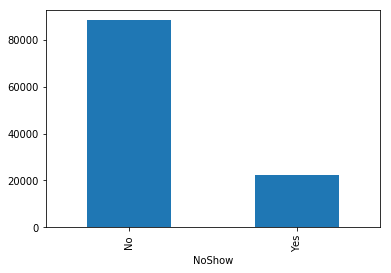

In [15]:
count = data[['AppointmentID','NoShow']].groupby('NoShow').count()
print(count)
plot1  = data[['AppointmentID','NoShow']].groupby('NoShow').count().plot(kind='bar',legend=False)

#### 3.2 Build correlation matrix to see how each variables are correlated with each other

In [16]:
corr = data[data.columns].corr()
corr

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,whichHour,days_difference
PatientId,1.000000,0.004039,-0.004158,-0.002873,-0.006484,0.001612,0.011016,-0.007760,-0.009774,0.002588,-0.001095
AppointmentID,0.004039,1.000000,-0.019220,0.022632,0.012764,0.022643,0.032954,0.014008,-0.256617,-0.050203,-0.771190
Age,-0.004158,-0.019220,1.000000,-0.092407,0.504907,0.292612,0.095908,0.077126,0.012729,0.013544,0.032718
Scholarship,-0.002873,0.022632,-0.092407,1.000000,-0.019740,-0.024904,0.035016,-0.008489,0.001182,-0.024274,-0.030076
Hypertension,-0.006484,0.012764,0.504907,-0.019740,1.000000,0.433092,0.087968,0.080328,-0.006318,-0.033945,-0.018757
Diabetes,0.001612,0.022643,0.292612,-0.024904,0.433092,1.000000,0.018468,0.057677,-0.014561,-0.014176,-0.028083
Alcoholism,0.011016,0.032954,0.095908,0.035016,0.087968,0.018468,1.000000,0.004709,-0.026155,-0.001639,-0.037823
Handicap,-0.007760,0.014008,0.077126,-0.008489,0.080328,0.057677,0.004709,1.000000,-0.023960,0.002013,-0.019508
SMS_received,-0.009774,-0.256617,0.012729,0.001182,-0.006318,-0.014561,-0.026155,-0.023960,1.000000,0.061557,0.388191
whichHour,0.002588,-0.050203,0.013544,-0.024274,-0.033945,-0.014176,-0.001639,0.002013,0.061557,1.000000,0.082985


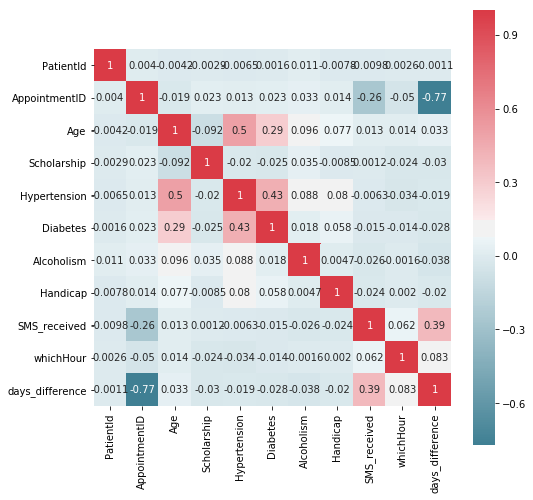

In [17]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)

#### From correlation matrix, we can see that age is positively correlated with hypertension(0.5) meaning as age increases hypertension tends to increase by 50% and similarly diabetes has positive correlation of 0.29 with age.

#### 3.3 Gender analysis - number of men and women who showed up or missed their appointments

Gender  NoShow
F       No        57239
        Yes       14591
M       No        30960
        Yes        7725
Name: NoShow, dtype: int64


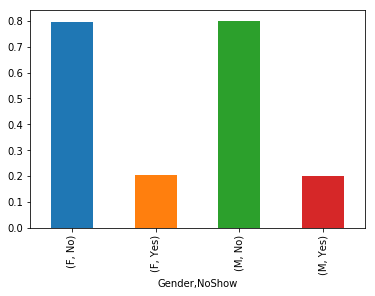

In [18]:
gender=data.groupby(['Gender','NoShow'])['NoShow'].size()
print(gender)
plot2= data.groupby('Gender')['NoShow'].value_counts(normalize = True).plot(kind='bar')

#### We can see that women visit hospitals slightly more than men. But we don't have any data to analyize why this pattern.

#### 3.4 Plot the number of men and women suffering from each of the medical problems in the data

        Hypertension  Diabetes  Alcoholism  Handicap
Gender                                              
F              15338      5606        1223      1400
M               6462      2337        2137      1053


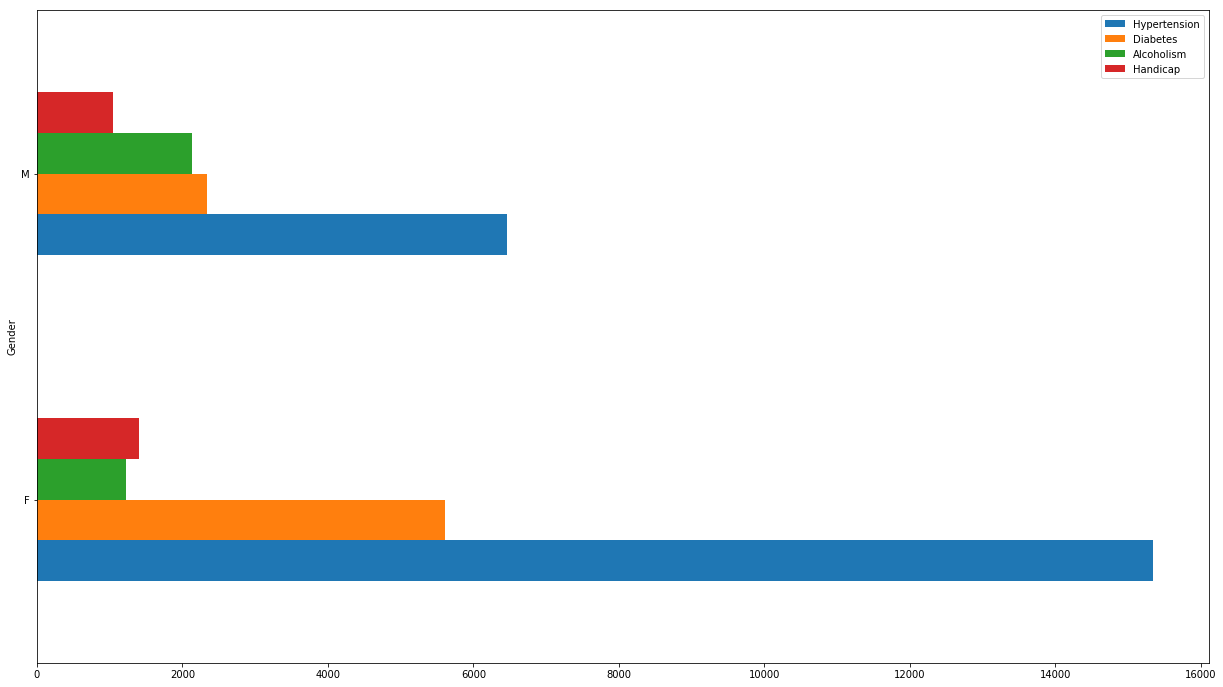

In [19]:
problem=data[['Gender','Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']].groupby(['Gender']).sum()
print(problem)
plot3=data[['Gender','Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']].groupby(['Gender']).sum().plot(kind='barh',figsize=(21,12))

#### 3.5 create a new class feature_analysis which will:
1. The class feature analysis, takes the feature(Diabetes, Hypertension, etc) as input to the class followed by a constructor  and two methds: Visual and calc. 
2. visual class: Plots the countplot using the feature assigned from the dataframe 
3. calc class: Calculates what percentage of patients missed appointments

In [20]:
class feature_analysis(object):
    def __init__(self,feature):
        self.feature = feature
    
    def visual(self,df):
        sns.countplot(self.feature,data=df,hue='NoShow',palette='viridis')

    def calc(self,df,x):
        percentage = (sum((df[self.feature]==x) & (df['NoShow']=='Yes'))/sum(df[self.feature]==x))*100
        print('The Percentage of {} patients not attending appointments is: {}%'.format(self.feature,round(percentage,2)))

#### 3.6 Using the class written above, plot the graphs for percentage of each diseased pateint's show or no show

The Percentage of Diabetes patients not attending appointments is: 18.0%


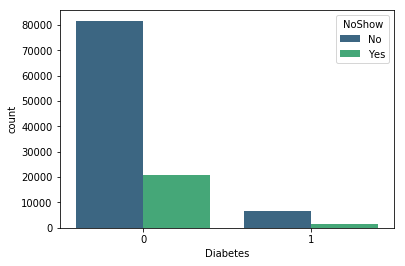

In [21]:
f1 = feature_analysis('Diabetes')
f1.visual(data)
f1.calc(data,1)

The Percentage of Alcoholism patients not attending appointments is: 20.15%


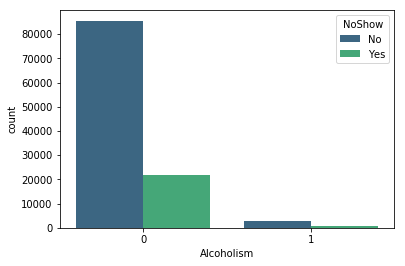

In [22]:
f2 = feature_analysis('Alcoholism')
f2.visual(data)
f2.calc(data,1)

The Percentage of Handicap patients not attending appointments is: 17.83%


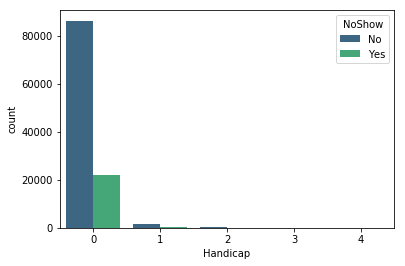

In [23]:
f3 = feature_analysis('Handicap')
f3.visual(data)
f3.calc(data,1)

The Percentage of Hypertension patients not attending appointments is: 17.3%


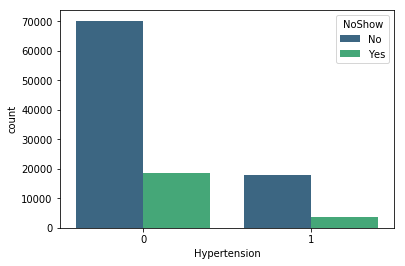

In [24]:
f4 = feature_analysis('Hypertension')
f4.visual(data)
f4.calc(data,1)

#### 3.7 Which day of the week were more appointments booked?

Monday 22712
Tuesday 25637
Wednesday 25866
Thursday 17244
Friday 19017
Saturday 39


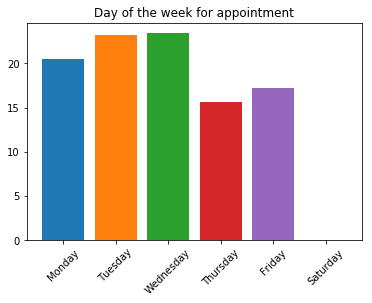

In [25]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for index,i in enumerate(weekdays):
    j=data[data.appointment_day==i]
    count=len(j)
    total_count=len(data)
    perc=(count/total_count)*100
    print(i,count)
    plt.bar(index,perc)
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.title('Day of the week for appointment')
plt.show()

#### 3.8 Which day of the week were more appointments missed?

Monday 4689 21.011830077074745
Tuesday 5152 23.086574654956085
Wednesday 5093 22.822190356694747
Thursday 3336 14.94891557626815
Friday 4037 18.090159526796917
Saturday 9 0.04032980820935651


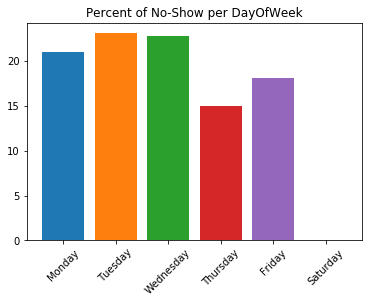

In [26]:
no_Show_Yes=data[data['NoShow']=='Yes']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for index,i in enumerate(weekdays):
    k=no_Show_Yes[no_Show_Yes.appointment_day==i]
    count=len(k)
    total_count=len(no_Show_Yes)
    perc=(count/total_count)*100
    print(i,count,perc)
    plt.bar(index,perc)

plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.title('Percent of No-Show per DayOfWeek')
plt.show()

#### 3.9 Lets look at the location of hospitals, which neighbourhood has more appointments?

Neighbourhood
PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         8
ILHA DO FRADE                    10
ILHA DO BOI                      35
PONTAL DE CAMBURI                69
MORADA DE CAMBURI                96
NAZARETH                        135
SEGURANÇA DO LAR                145
UNIVERSITÁRIO                   152
HORTO                           175
SANTA HELENA                    178
ENSEADA DO SUÁ                  235
FRADINHOS                       258
ANTÔNIO HONÓRIO                 270
ARIOVALDO FAVALESSA             282
DE LOURDES                      305
COMDUSA                         310
BOA VISTA                       312
MÁRIO CYPRESTE                  371
DO MOSCOSO                      413
BARRO VERMELHO                  423
SANTA LUÍZA                     428
SANTA LÚCIA                     438
SANTA CECÍLIA                   448
PIEDADE                         452
SOLON BORGES                    469
SANTA CLARA   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

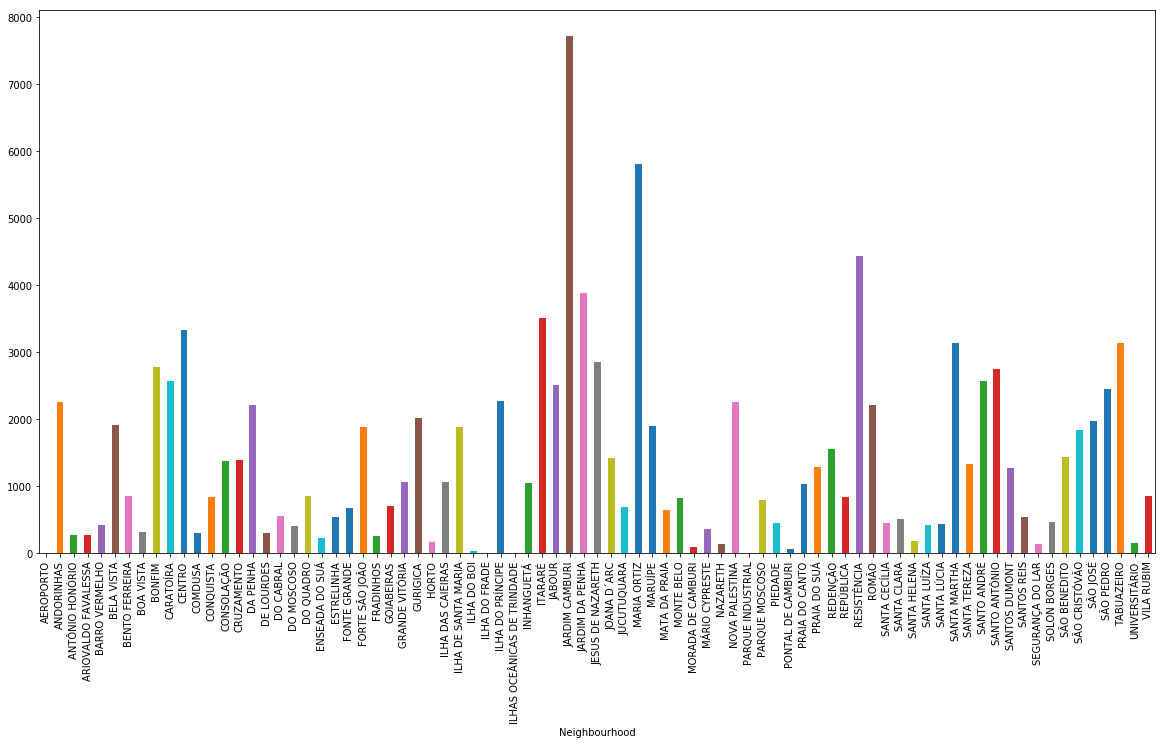

In [27]:
location=data.groupby(['Neighbourhood'],sort=False).size()
print(location.sort_values())
location_plot=data.groupby(['Neighbourhood']).size().plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=90)

#### 3.10 What percentage of men and women missed their appointments?

In [28]:
Men_perc=data[(data['Gender']=='M') & (data['NoShow']=='Yes')].count()
Women_perc=data[(data['Gender']=='F') & (data['NoShow']=='Yes')].count()
Men_total=len((data['Gender']=='M'))
Women_total=len((data['Gender']=='F'))
percentage_of_Women=(Women_perc/Women_total)*100
percentage_of_men=(Men_perc/Men_total)*100
print("Percentage of women who missed their appointment: ",np.round(percentage_of_Women['Gender'],0),"%")
print("Percentage of men who missed their appointment:  ",np.round(percentage_of_men['Gender'],0),"%")

Percentage of women who missed their appointment:  13.0 %
Percentage of men who missed their appointment:   7.0 %


#### 3.10.1 Lets visualize the total percentage of appointments missed in terms of 100% split between men and women

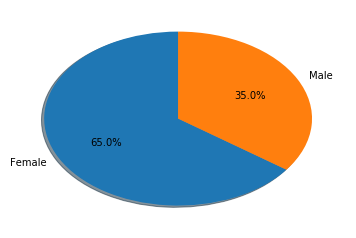

In [29]:
labels='Female','Male'
sizes=[13,7]
plot = plt.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

#### 3.11 Scholarship analysis to no show

NoShow  Scholarship
No      0              79916
        1               8283
Yes     0              19738
        1               2578
Name: Scholarship, dtype: int64


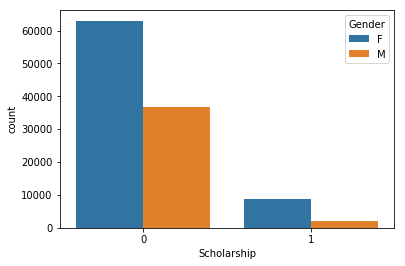

In [30]:
sns.countplot(x='Scholarship',data=data,hue='Gender')
scholarship=data.groupby(['NoShow','Scholarship'])['Scholarship'].count()
print(scholarship)

#### 3.12 NoShow analysis of the appointment_day and difference in appointment day to scheduled day

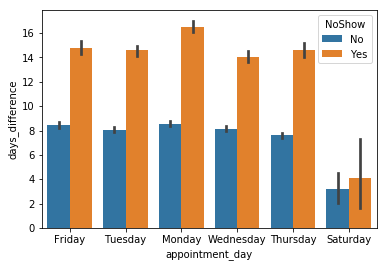

In [31]:
sns.barplot(x ='appointment_day',y='days_difference',hue='NoShow', data=data)
plt.show()

#### 3.13 Plot the age vs difference in appointment day to schedulded day

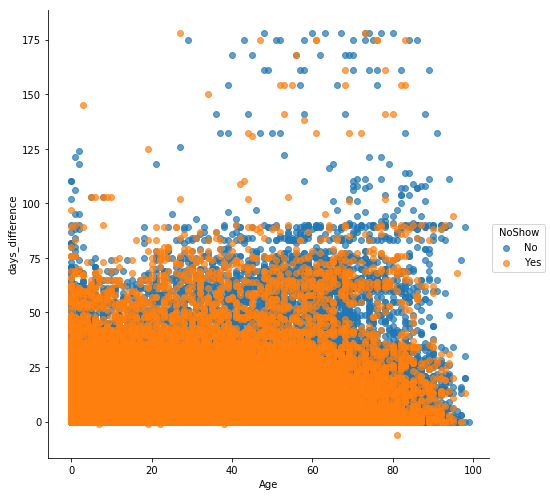

In [32]:
g = sns.FacetGrid(data , hue='NoShow',size=7)
g.map(plt.scatter,'Age','days_difference', alpha = .7)
g.add_legend();
plt.show()

#### 3.14 Define a function which will classify the age to Child, Adult and Senior

In [33]:
def FormatAge (age):
    if age['Age']>0 and age['Age']<=17 :
        return 'Child'
    elif age['Age']>=18 and age['Age'] <50:
        return 'Adult'
    else:
        return 'Senior'

#### 3.14.1  Classification of age based on the above classes.

In [34]:
data['AgeClass'] = data.apply(FormatAge,axis=1)

#### 3.15 Plot the age distribution in there respective age class and the show /no show of age class

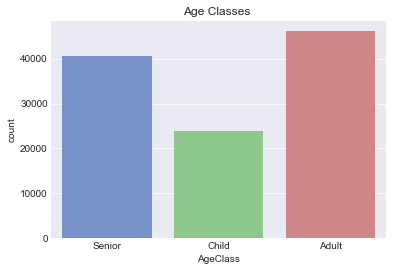

Age  NoShow
0    No        0.819441
     Yes       0.180559
1    No        0.817422
     Yes       0.182578
2    No        0.844252
     Yes       0.155748
3    No        0.816920
     Yes       0.183080
4    No        0.782910
     Yes       0.217090
5    No        0.785091
     Yes       0.214909
6    No        0.792242
     Yes       0.207758
7    No        0.789068
     Yes       0.210932
8    No        0.776685
     Yes       0.223315
9    No        0.734694
     Yes       0.265306
10   No        0.761381
     Yes       0.238619
11   No        0.793305
     Yes       0.206695
12   No        0.750916
     Yes       0.249084
13   No        0.725295
     Yes       0.274705
14   No        0.717352
     Yes       0.282648
                 ...   
84   Yes       0.112540
85   No        0.821818
     Yes       0.178182
86   No        0.838462
     Yes       0.161538
87   No        0.853261
     Yes       0.146739
88   No        0.904762
     Yes       0.095238
89   No        0.832370
    

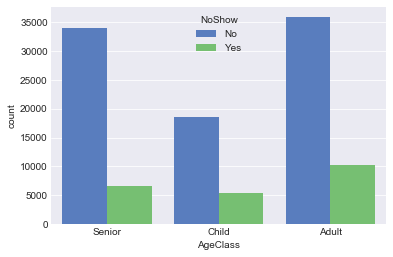

In [35]:
sns.set_style('darkgrid')

sns.countplot(data['AgeClass'], alpha =.80,palette="muted")
plt.title('Age Classes ')
plt.show()

print (data.groupby('Age')['NoShow'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='AgeClass', data=data,hue='NoShow', palette="muted");
plt.show()

#### 3.16 Plot of Show/Noshow to SMS Received

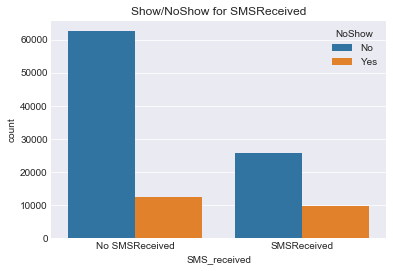

In [36]:
ax = sns.countplot(x=data.SMS_received, hue=data.NoShow, data=data)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### 3.17 Scholorship Analysis for Show/NoShow

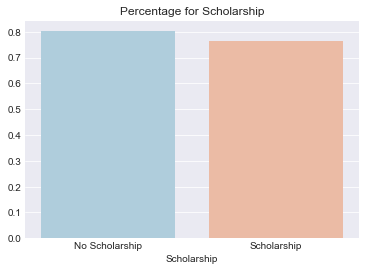

In [37]:
df_s_ratio = data[data.NoShow == 'No'].groupby(['Scholarship']).size()/data.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above graph, we can see that 80% have come for the visit with no Scholarship and 75% came to visit with Scholarship.

### 4.Machine Learning Models

#### 4.1 Create model with NoShow as the predictor variable. Convert categorical values to 0 and 1

In [38]:
Y = data['NoShow']
Y = Y.map({'No': 0, 'Yes': 1})

X = data.drop(labels = ['NoShow', 'PatientId', 'AppointmentID'], axis = 1)
X['Neighbourhood'] = X['Neighbourhood'].astype('category').cat.codes
X['appointment_day'] = X['appointment_day'].astype('category').cat.codes
X['Gender'] = X['Gender'].map({'M': 0, 'F': 1})

#### 4.1.1 Drop the columns which are not required for model analysis

In [39]:
X = X.drop(labels = ['ScheduledDay', 'AppointmentDay', 'ScheduledDayDate','AgeClass'], axis = 1)

#### 4.1.2 split the data into training and testing dataset in the ratio 75:25

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#### 4.2 LogisticRegression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

In logistic regression, the dependent variable is binary or dichotomous, i.e. it only contains data coded as 1 (TRUE, success  etc.) or 0 (FALSE, failure etc.). In this case, the outcome is Show or No-Show.

The goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest and a set of independent variables. Logistic regression generates the coefficients of a formula to predict a logit transformation of the probability of presence of the characteristic of interest


In [41]:
model1 = LogisticRegression()

model1.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = model1.predict(x_test)

In [43]:
score = model1.score(x_test, y_test)
print(score)

0.7961200188208042


In [44]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[21891   215]
 [ 5418   105]]


In [45]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.99      0.89     22106
          1       0.33      0.02      0.04      5523

avg / total       0.71      0.80      0.72     27629



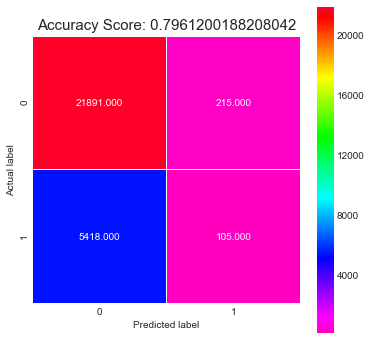

In [46]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gist_rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [47]:
df1=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})  
df1

,Actual,Predicted
103525,0,0
72652,0,0
35774,0,0
72608,0,0
74580,0,0
73699,0,0
68464,0,0
58340,0,0
87300,0,1
63746,0,0


#### Logistic regression gives accuracy of 79.61% for this data. So, if a new patient data is given as input to this model, we can predict with 79% accuracy if that patient shows up or not for the appointment scheduled.

#### FIle output

In [48]:
df1.to_csv('LogisticRegression_classification.csv')

#### 4.3 Random Forest

Random forest or random decision forest is an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. For our analysis random forest serves as a classifier for classifying if a patient shows-up.

In [49]:
model2 = RandomForestClassifier(n_estimators = 10, max_depth = 10)

model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
predictions1 = model2.predict(x_test)

In [51]:
score1 = model2.score(x_test, y_test)
print(score1)

0.7997394042491585


In [52]:
cm1 = metrics.confusion_matrix(y_test, predictions1)
print(cm1)

[[22066    40]
 [ 5493    30]]


In [53]:
print(classification_report(y_test, predictions1))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     22106
          1       0.43      0.01      0.01      5523

avg / total       0.73      0.80      0.71     27629



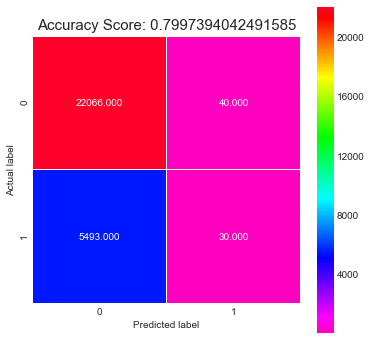

In [54]:
plt.figure(figsize=(6,6))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gist_rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

In [55]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':predictions1})  
df2

,Actual,Predicted
103525,0,0
72652,0,0
35774,0,0
72608,0,0
74580,0,0
73699,0,0
68464,0,0
58340,0,0
87300,0,0
63746,0,0


#### Random forest gives an accuracy of 79.97% which is better compared to Logistic Regression.

#### 4.3 Naive Bayes Classification

In machine learning, Naive Bayes classifiers (sometimes called the idiot Bayes model) are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. So, we are applying gausian naive bayes model to clasify show or noshow of patients.


In [56]:
model3 = GaussianNB()

In [57]:
model3.fit(x_train, y_train)

GaussianNB(priors=None)

In [58]:
predictions2 = model3.predict(x_test)

In [59]:
score2 = model3.score(x_test, y_test)
print(score2)

0.7694451482138333


In [60]:
cm2 = metrics.confusion_matrix(y_test, predictions2)
print(cm2)

[[20489  1617]
 [ 4753   770]]


In [61]:
print(classification_report(y_test, predictions2))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87     22106
          1       0.32      0.14      0.19      5523

avg / total       0.71      0.77      0.73     27629



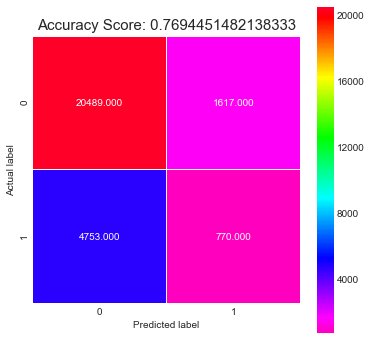

In [62]:
plt.figure(figsize=(6,6))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gist_rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);

In [63]:
df3=pd.DataFrame({'Actual':y_test, 'Predicted':predictions2})  
df3

,Actual,Predicted
103525,0,0
72652,0,0
35774,0,0
72608,0,0
74580,0,0
73699,0,0
68464,0,0
58340,0,0
87300,0,1
63746,0,0


#### Naive bayes gives accuracy of 76.94% to predicit the output.

#### 4.4 Decision Tree

Decision tree is largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions, decision tree makes sequential, hierarchical decision about the outcome variable based on the predictor data. Hierarchical means the model is defined by a series of questions that lead to a class label or a value when applied to any observation. Once set up, the model acts like a protocol in a series of “if this occurs then this occurs” conditions that produce a specific result from the input data.
A Non-parametric method means that there are no underlying assumptions about the distribution of the errors or the data. It basically means that the model is constructed based on the observed data.

In [64]:
model4 = tree.DecisionTreeClassifier()
model4.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
predictions3 = model4.predict(x_test)

In [66]:
score3 = model4.score(x_test, y_test)
print(score3)

0.7189547214882913


In [67]:
cm3 = (confusion_matrix(y_test, predictions3))  
print(cm3)

[[17997  4109]
 [ 3656  1867]]


In [68]:
print(classification_report(y_test, predictions3))

             precision    recall  f1-score   support

          0       0.83      0.81      0.82     22106
          1       0.31      0.34      0.32      5523

avg / total       0.73      0.72      0.72     27629



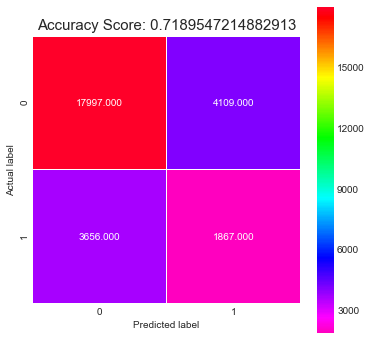

In [69]:
plt.figure(figsize=(6,6))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'gist_rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score3)
plt.title(all_sample_title, size = 15);

In [70]:
df4=pd.DataFrame({'Actual':y_test, 'Predicted':predictions3})  
df4

,Actual,Predicted
103525,0,0
72652,0,0
35774,0,1
72608,0,0
74580,0,0
73699,0,0
68464,0,0
58340,0,1
87300,0,1
63746,0,0


#### Decision tree predicts with accuracy of 71.89% .

#### 4.5 K Means Clustering
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data.
Labels for the training data (each data point is assigned to a single cluster)
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed originally.

In [71]:
model5 = KMeans(n_clusters=2)
model5.fit(x_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
predictions4 = model5.predict(x_test)

In [73]:
labels = KMeans(2, random_state=0).fit_predict(x_test)

In [74]:
print(classification_report(y_test, predictions4))

             precision    recall  f1-score   support

          0       0.78      0.49      0.60     22106
          1       0.18      0.43      0.25      5523

avg / total       0.66      0.48      0.53     27629



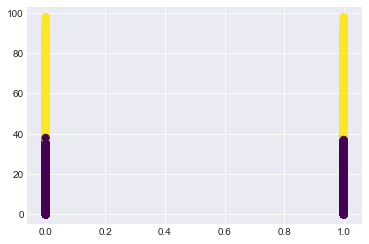

In [75]:
plt.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, c=labels,
            s=50, cmap='viridis');

In [76]:
df5=pd.DataFrame({'Actual':y_test, 'Predicted':predictions4})  
df5

,Actual,Predicted
103525,0,1
72652,0,0
35774,0,0
72608,0,0
74580,0,1
73699,0,0
68464,0,1
58340,0,0
87300,0,0
63746,0,0


### 5. Conclusion

1. 79.79% did show up for the appointment whereas 20.2% of them did not.
2. Women visit hospitals more than men.
3. Hypertension is seen more in women which might be one of the reasons why women visit hospitals more than men.
4. Alcoholic patients tend to miss the appointments more compared to other diseased patients.
5. Most of the appointments were missed on Tuesday and Wednesday and surprisingly most appointments were booked on the same days of the week.
6. SMS-Received or Scholorship seem to have no effect on the appointments show or no-show.
7. Adults followed by Seniors missed most of the appointments.
8. From the models, Random Forest followed by Logistic regression work best for the data.

### End